In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import pandas as pd

%matplotlib inline

sns.set_context("poster")
sns.set_style("white")

In [159]:
df = pd.read_csv("./data/1-cat.csv")
df.head()

,year,count,category
0,2018,438,Materials Science
1,2017,208,Materials Science
2,2016,99,Materials Science
3,2015,72,Materials Science
4,2014,41,Materials Science


In [185]:
marker_size = 175
marker_alpha = 0.6

# Visualize with MatplotLib

## All Together

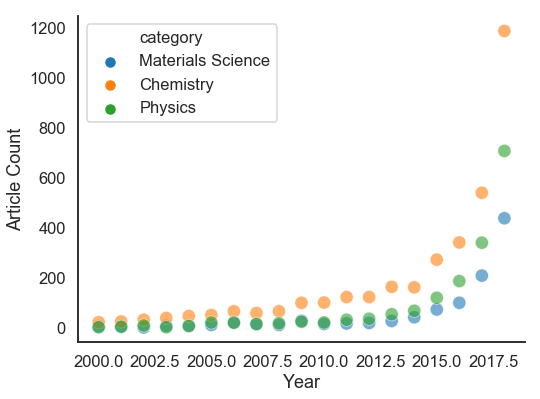

In [186]:
from matplotlib.ticker import MaxNLocator, MultipleLocator

f, axs = plt.subplots(1,1,figsize=(8,6))

axs = sns.scatterplot(x="year", y="count",
                     hue="category", data=df, 
                     s=marker_size, alpha=marker_alpha)
axs.set_xlabel("Year")
axs.set_ylabel("Article Count")
sns.despine()

## Grid

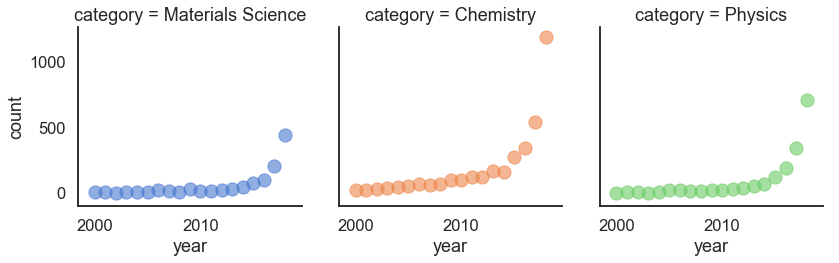

In [187]:
sns.set_context("talk")

sns.lmplot(x="year", y="count", col="category", 
           hue="category", data=df,
           col_wrap=3, ci=None, palette="muted", height=4, fit_reg=False,
           scatter_kws={"s": marker_size, "alpha": marker_alpha})

# Individual

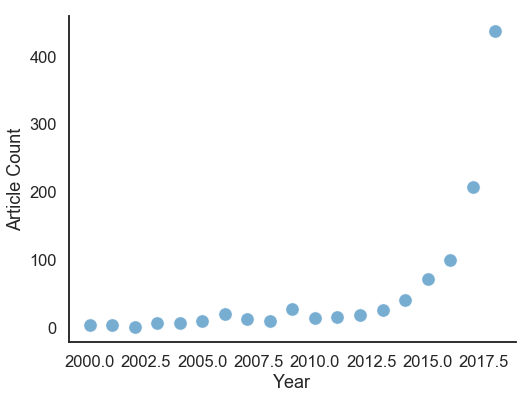

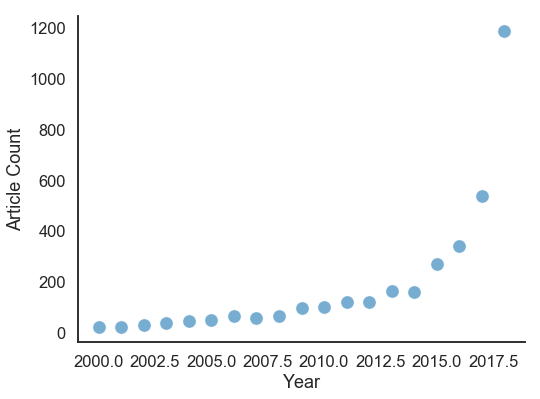

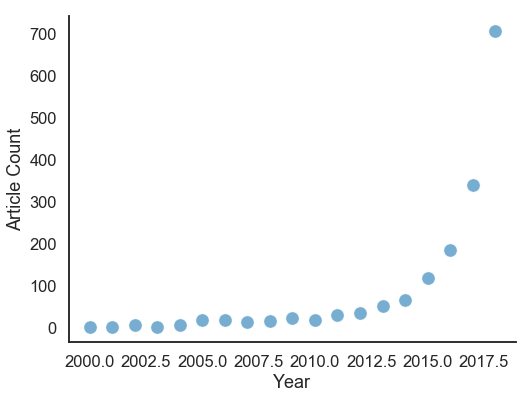

In [188]:
from matplotlib.ticker import MaxNLocator, MultipleLocator

for category in df['category'].unique():
    f, axs = plt.subplots(1,1,figsize=(8,6))

    data = df[df['category']==category]
    axs = sns.scatterplot(x="year", y="count",
                        data=data, s=marker_size, 
                        alpha=marker_alpha)
    axs.set_xlabel("Year")
    axs.set_ylabel("Article Count")
    sns.despine()

# Visualize with Altair

## All Together

In [179]:
data = df[df['category']=='Chemistry']

charts = []
colors = ["red","blue","green"]

for i, category in enumerate(df['category'].unique()):
    data = df[df['category']==category]
    chart = alt.Chart(data[['year','count']]).mark_circle(size=marker_size, color=colors[i]).encode(
        x=alt.X('year', scale=alt.Scale(domain=(2000, 2019))),
        y=alt.Y('count')).properties(
        width=500,
        height=350,
        title=category
    )
    charts.append(chart)

## All Together

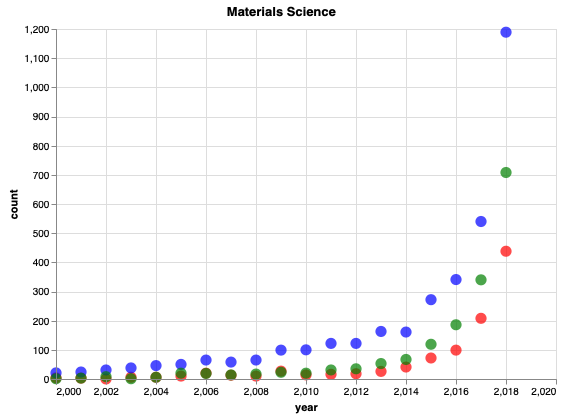

In [180]:
charts[0] + charts[1] + charts[2]

## Grid

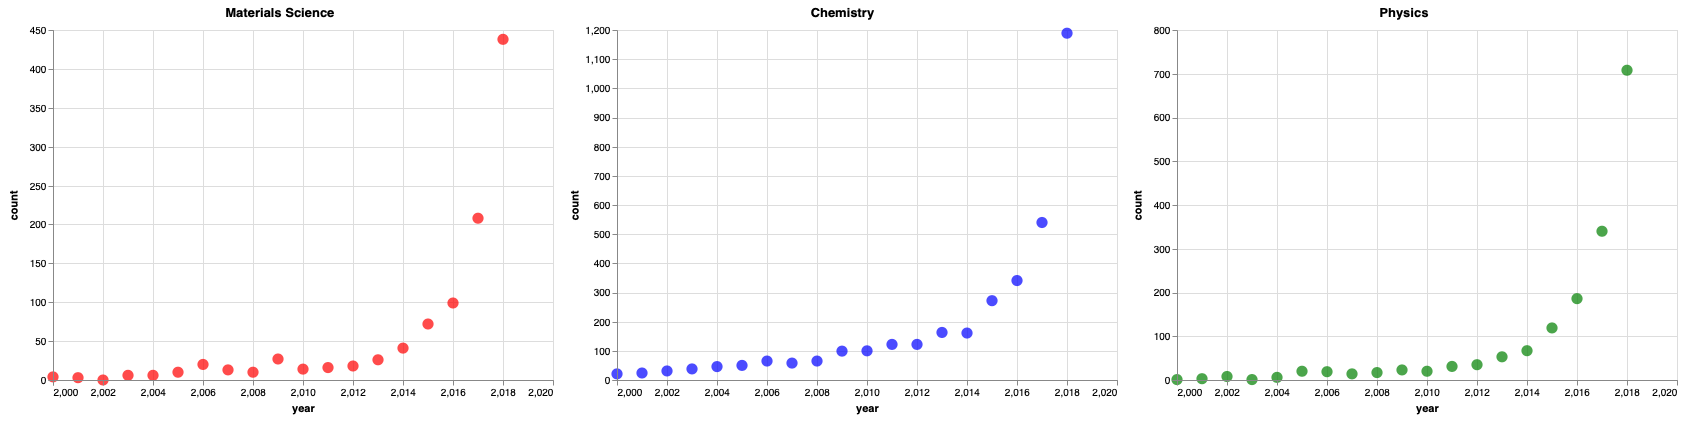

In [181]:
charts[0] | charts[1] | charts[2]

## Individual

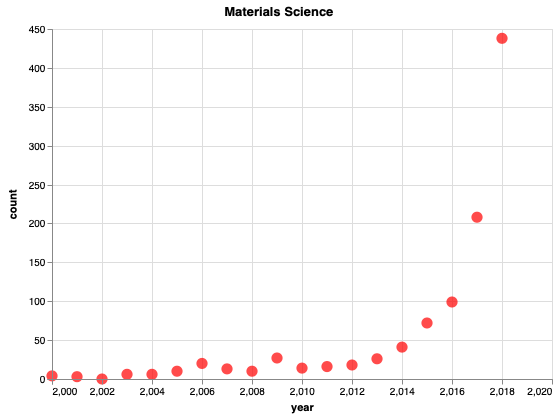

In [182]:
charts[0]

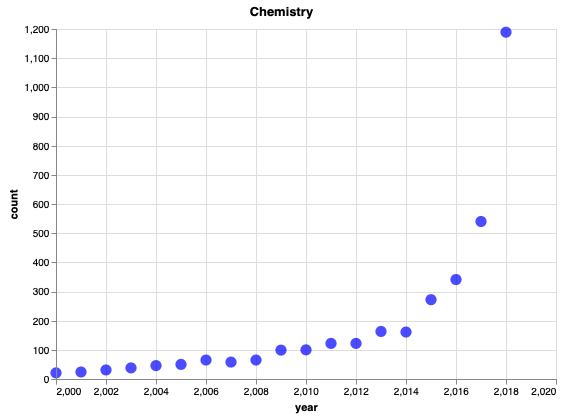

In [183]:
charts[1]

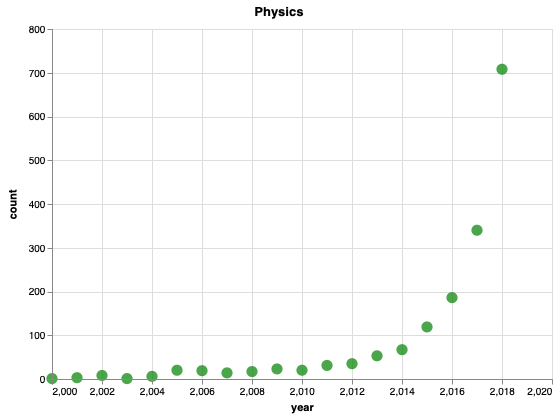

In [184]:
charts[2]